In [1]:
from snownlp import SnowNLP
import jieba
from snownlp import sentiment
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


#讓用語更接近台灣
jieba.load_userdict('lexicon_dict.txt')
#停用字字典
stopwords_dic = 'stopword.txt'

df_Tainan = pd.read_csv('dataset_Tainan_test.csv')
df_Taichung = pd.read_csv('dataset_Taichung.csv')
df_Taipei = pd.read_csv('dataset_Taipei.csv')

df_Taipei.columns = ['飯店','評分','評論']
df_Taichung.columns = ['飯店','評分','評論']
df_Tainan.columns = ['飯店','評分','評論']

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.488 seconds.
Prefix dict has been built successfully.


In [2]:
df_Taipei

,飯店,評分,評論
0,喜瑞飯店 (中山區) Ambience Hotel,5,親切熱心耐心的服務，很棒，房間很乾淨，周邊購物方便，加上有洗衣間很方便，彷彿到了去日本度假的...
1,喜瑞飯店 (中山區) Ambience Hotel,5,<<優質的飯店>> 親切貼心、乾淨整潔、 交通方便、早餐美味、 採光明亮、我給十分。 因...
2,喜瑞飯店 (中山區) Ambience Hotel,5,環境乾淨整潔，客房不大但是感覺明亮寬敞。 謝謝櫃檯Mei跟Winni的小卡片，以及Cate跟...
3,喜瑞飯店 (中山區) Ambience Hotel,5,"櫃檯服務人員親切又用心，Winni.LIn櫃檯人員很棒👍👍,住宿整體感覺很棒 又乾淨 浴室風..."
4,喜瑞飯店 (中山區) Ambience Hotel,5,非常謝謝整間飯店給予的生日驚喜，尤其是可愛的櫃檯小姐、友善的房務阿姨，這真的是史上最棒的生日...
...,...,...,...
14286,寒舍艾麗酒店 (信義區) Humble House Taipei,5,入住時，辦理手續非常迅速。可惜的是因為疫情客人不多只開放到16F。被升等到101景觀房，10...
14287,寒舍艾麗酒店 (信義區) Humble House Taipei,1,我於7/11入住此飯店，7/12 12:30退房。 晚上回家看手機收到信用卡通知 7/12 ...
14288,寒舍艾麗酒店 (信義區) Humble House Taipei,5,停車需和商場停車一起共用是小缺點，若遇到車多時刻就需要排隊。櫃檯人員很親切，房間大小適中且乾...
14289,寒舍艾麗酒店 (信義區) Humble House Taipei,3,因為疫情關係連帶影響品質？理解疫情影響許多產業，想減少虧損，但和以往入住幾次的經驗相比，近期...


In [3]:
#整合成一個Dataframe
df_temp = df_Taipei.append(df_Taichung,ignore_index=True)
df = df_temp.append(df_Tainan,ignore_index=True)
df

,飯店,評分,評論
0,喜瑞飯店 (中山區) Ambience Hotel,5,親切熱心耐心的服務，很棒，房間很乾淨，周邊購物方便，加上有洗衣間很方便，彷彿到了去日本度假的...
1,喜瑞飯店 (中山區) Ambience Hotel,5,<<優質的飯店>> 親切貼心、乾淨整潔、 交通方便、早餐美味、 採光明亮、我給十分。 因...
2,喜瑞飯店 (中山區) Ambience Hotel,5,環境乾淨整潔，客房不大但是感覺明亮寬敞。 謝謝櫃檯Mei跟Winni的小卡片，以及Cate跟...
3,喜瑞飯店 (中山區) Ambience Hotel,5,"櫃檯服務人員親切又用心，Winni.LIn櫃檯人員很棒👍👍,住宿整體感覺很棒 又乾淨 浴室風..."
4,喜瑞飯店 (中山區) Ambience Hotel,5,非常謝謝整間飯店給予的生日驚喜，尤其是可愛的櫃檯小姐、友善的房務阿姨，這真的是史上最棒的生日...
...,...,...,...
42226,我小時候 (安平) Wikid Design Hotel,5,我在這裏住了兩個晚上是在七月。 這是一個甜b&b位於安平。 大約從臺南火車站10分鐘車程。 ...
42227,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,2,"晚上七點回到飯店,就可以聽到隔壁房間電視的聲音,仔細聽還可以分辨出是在看哪一台,然後最誇張的..."
42228,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,1,這是一次令人不滿意的住宿體驗，甚至於讓我感到憤怒；我曾經在全世界數十個國家旅行，包含一些經濟...
42229,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,3,櫃檯人員服務親切，離夜市很近，早餐美味可口，若在台南市區找不到飯店的，可以考慮選擇入住，令人...


In [4]:
#看一下評分數量分布
df['評分'].value_counts()

5    28811
4     9969
3     2327
2      572
1      552
Name: 評分, dtype: int64

<AxesSubplot:>

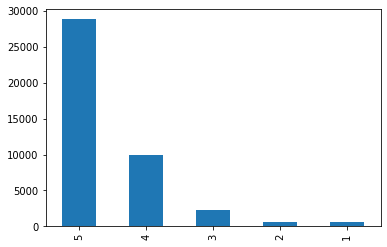

In [5]:
#繪製出圖形 得知 正平和負評資料量差距過多 不過因為資料量足夠 所以採用下取樣
df['評分'].value_counts().plot.bar()

In [6]:
#目前只分成正向和負向評論 因此決定 4,5星為正評=1  1,2,3星的為負評=0
def pos_neg_split(df):
    df["正負評"] = df["評分"].apply(lambda x: 1 if x>3 else 0)

In [7]:
#將正負評加入DataFram
pos_neg_split(df)

In [8]:
df

,飯店,評分,評論,正負評
0,喜瑞飯店 (中山區) Ambience Hotel,5,親切熱心耐心的服務，很棒，房間很乾淨，周邊購物方便，加上有洗衣間很方便，彷彿到了去日本度假的...,1
1,喜瑞飯店 (中山區) Ambience Hotel,5,<<優質的飯店>> 親切貼心、乾淨整潔、 交通方便、早餐美味、 採光明亮、我給十分。 因...,1
2,喜瑞飯店 (中山區) Ambience Hotel,5,環境乾淨整潔，客房不大但是感覺明亮寬敞。 謝謝櫃檯Mei跟Winni的小卡片，以及Cate跟...,1
3,喜瑞飯店 (中山區) Ambience Hotel,5,"櫃檯服務人員親切又用心，Winni.LIn櫃檯人員很棒👍👍,住宿整體感覺很棒 又乾淨 浴室風...",1
4,喜瑞飯店 (中山區) Ambience Hotel,5,非常謝謝整間飯店給予的生日驚喜，尤其是可愛的櫃檯小姐、友善的房務阿姨，這真的是史上最棒的生日...,1
...,...,...,...,...
42226,我小時候 (安平) Wikid Design Hotel,5,我在這裏住了兩個晚上是在七月。 這是一個甜b&b位於安平。 大約從臺南火車站10分鐘車程。 ...,1
42227,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,2,"晚上七點回到飯店,就可以聽到隔壁房間電視的聲音,仔細聽還可以分辨出是在看哪一台,然後最誇張的...",0
42228,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,1,這是一次令人不滿意的住宿體驗，甚至於讓我感到憤怒；我曾經在全世界數十個國家旅行，包含一些經濟...,0
42229,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,3,櫃檯人員服務親切，離夜市很近，早餐美味可口，若在台南市區找不到飯店的，可以考慮選擇入住，令人...,0


In [9]:
#下採樣
def lower_sample_data(df):
    
    #正評=1 負評=0 將他們的資料區分開來 (正評數量較多、負評數量較少)
    pos = df[df['正負評'] == 1]  #找出所有正評
    neg = df[df['正負評'] == 0]  #找出所有負評
    
    # 取出和負評數量相同的正評 並隨機抽取第幾筆正評
    #random.randint 範圍是 pos的長度 , 取出根負評一樣多的數量
    #index = np.random.randint(len(pos), size=1 * (len(df) - len(pos)))
    #不重複採樣  
    index = np.random.choice(len(pos), size=1 * (len(df) - len(pos)))  

    lower_sample_pos = pos.iloc[list(index)]  # 將隨機生成的index 在正評裡面取出(下採樣) 
    
    return lower_sample_pos, neg #將正評和負評回傳

In [10]:
#得到 正評負評相同數量的dataset
pos,neg = lower_sample_data(df)
df = pd.concat([pos,neg])
df

,飯店,評分,評論,正負評
19613,新驛旅店 - 台中車站店 (東區) CityInn Hotel Plus - Taichun...,5,感恩選了這旅館，職員有禮，交通方便，早餐選擇雖不多卻款式美味，新鮮，用心製作。房間設計有創意...,1
26195,長榮桂冠酒店 (西屯) Evergreen Laurel Hotel Taichung,4,這是台中地區一家很好的商務酒店。各方面水準高。乾淨寬敞的房間，有一張好的床。餐館也很好。友好...,1
25209,新驛旅店 - 台中車站店 (東區) CityInn Hotel Plus - Taichun...,4,"雖然房間有點小,牀很舒服而且洗手間很乾淨。 它很安靜雖然離火車站很近。 有免費洗衣免費洗衣粉...",1
31140,Mini Hotels(逢甲館) (西屯) Mini Hotels Fengjia Branch,5,乾淨清潔，工業風的設計 小孩子可以盡情的遊戲跟照相 早餐有中、西式可以挑選 門口還有仿古式抽...,1
13031,丹迪旅店 - 天母店 (士林) Dandy Hotel - Tianmu Branch,5,我希望每家酒店都是這樣就好了！ 束河的牀是我睡過的最舒適的。 早餐也很美味。 那裏有很多的商...,1
...,...,...,...,...
42173,晨曦山莊 (左鎮) Chen Xi B&B,1,CP值極低～ 很會利用照片吸睛～ 覺得被坑$狠大～ Google 有時候也會失準～ 早餐爛～...,0
42227,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,2,"晚上七點回到飯店,就可以聽到隔壁房間電視的聲音,仔細聽還可以分辨出是在看哪一台,然後最誇張的...",0
42228,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,1,這是一次令人不滿意的住宿體驗，甚至於讓我感到憤怒；我曾經在全世界數十個國家旅行，包含一些經濟...,0
42229,新大南科大飯店 (新市) Sendale Tainan Science Park Hotel,3,櫃檯人員服務親切，離夜市很近，早餐美味可口，若在台南市區找不到飯店的，可以考慮選擇入住，令人...,0


<AxesSubplot:>

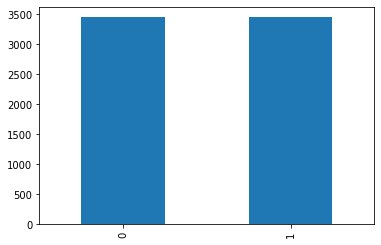

In [11]:
df['正負評'].value_counts().plot.bar()

In [12]:
#去除停用字 jieba無法直接載入停用字字典去做去除 因此要另外寫函式
#這裡是給文字雲使用
def remove_stop_words(seg_list):
  
    with open('stopword.txt','r',encoding="utf-8-sig") as f:
        stop_words = f.readlines()
        stop_words = [stop_word.rstrip() for stop_word in stop_words]
        
    new_list=""
    stop_words.append("飯店")
    stop_words.append("酒店")
    stop_words.append("房間")
    stop_words.append("服務")
    stop_words.append("員")

    for seg in seg_list:
        if seg not in stop_words:
            new_list+=seg+" "
    
    return new_list

#斷詞
def word_seg(text):
    return " ".join(jieba.cut(text))

#斷詞 文字雲
def word_seg2(text):
    l=[]
    for i in jieba.cut(text):
        l.append(i)
    return l


In [13]:
#文字雲前處理 去除一些停用字(和太常用到的飯店、酒店、房間、服務、員)
#進行斷詞
pos_seg=pos["評論"].apply(word_seg2)
neg_seg=neg["評論"].apply(word_seg2)

#文字雲 需要 字串形式並以空白隔開
pp = ""
nn = ""

for i in pos_seg:
    pp += remove_stop_words(i) +" " #去除停用字 並加到整個字串

for i in neg_seg:
    nn += remove_stop_words(i) +" " #去除停用字 並加到整個字串  


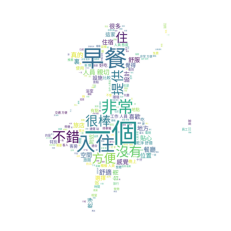

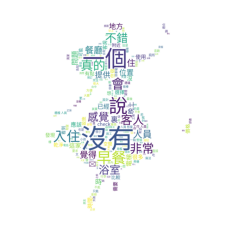

In [14]:
#畫文字雲
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
font = 'SourceHanSansTW-Regular.otf'
mask = np.array(Image.open('mask_alice.png'))
wc = WordCloud(background_color='white',mask=mask,font_path=font).generate(pp)

wc2 = WordCloud(background_color='white',mask=mask,font_path=font).generate(nn)

plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('wc.jpg')

plt.imshow(wc2)
plt.axis("off")
plt.show()
wc2.to_file('wc2.jpg')

In [15]:
#取出其中的評論 和 正負評
seg_comment =  df[['評論']]
pos_neg = df["正負評"]

In [16]:
#將評論的部分進行斷詞 並存成'評論斷詞'
seg_comment['評論斷詞'] = seg_comment['評論'].apply(word_seg)

<ipython-input-16-747fb18fb94e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_comment['評論斷詞'] = seg_comment['評論'].apply(word_seg)


In [17]:
seg_comment

,評論,評論斷詞
19613,感恩選了這旅館，職員有禮，交通方便，早餐選擇雖不多卻款式美味，新鮮，用心製作。房間設計有創意...,感恩 選 了 這 旅館 ， 職員 有禮 ， 交通 方便 ， 早餐 選擇 雖 不多 卻 款式 ...
26195,這是台中地區一家很好的商務酒店。各方面水準高。乾淨寬敞的房間，有一張好的床。餐館也很好。友好...,這是 台中 地區 一家 很 好 的 商務酒店 。 各 方面 水準 高 。 乾淨 寬敞 的 房...
25209,"雖然房間有點小,牀很舒服而且洗手間很乾淨。 它很安靜雖然離火車站很近。 有免費洗衣免費洗衣粉...","雖然 房間 有點 小 , 牀 很 舒服 而且 洗手間 很 乾淨 。 它 很 安靜 雖然 ..."
31140,乾淨清潔，工業風的設計 小孩子可以盡情的遊戲跟照相 早餐有中、西式可以挑選 門口還有仿古式抽...,乾淨 清潔 ， 工業 風 的 設計 小孩子 可以 盡情 的 遊戲 跟 照相 早餐 有...
13031,我希望每家酒店都是這樣就好了！ 束河的牀是我睡過的最舒適的。 早餐也很美味。 那裏有很多的商...,我 希望 每家 酒店 都 是 這樣 就 好 了 ！ 束河 的 牀 是 我 睡過 的 最 ...
...,...,...
42173,CP值極低～ 很會利用照片吸睛～ 覺得被坑$狠大～ Google 有時候也會失準～ 早餐爛～...,CP 值極 低 ～ 很會 利用 照片 吸睛 ～ 覺得 被 坑 $ 狠大 ～ Go...
42227,"晚上七點回到飯店,就可以聽到隔壁房間電視的聲音,仔細聽還可以分辨出是在看哪一台,然後最誇張的...","晚上 七點 回到 飯店 , 就 可以 聽到 隔壁 房間 電視 的 聲音 , 仔 細聽 還可以..."
42228,這是一次令人不滿意的住宿體驗，甚至於讓我感到憤怒；我曾經在全世界數十個國家旅行，包含一些經濟...,這是 一次 令人 不 滿意 的 住宿 體驗 ， 甚至 於 讓 我 感到 憤怒 ； 我 曾經 ...
42229,櫃檯人員服務親切，離夜市很近，早餐美味可口，若在台南市區找不到飯店的，可以考慮選擇入住，令人...,櫃檯 人員 服務 親切 ， 離 夜市 很近 ， 早餐 美味可口 ， 若 在 台南 市區 找 ...


In [18]:
#開始訓練模型
from sklearn.model_selection import train_test_split
#加上random_state確保每次程式運行都分割一樣的訓練集和測試集 不然的話在同個模型上，會得到不同的準確率 7成做訓練3成做測試
X_train, X_test, y_train, y_test = train_test_split(seg_comment, pos_neg,test_size=0.3, random_state=1)

In [19]:
#確認分割結果
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4831, 2)
X_test: (2071, 2)
y_train: (4831,)
y_test: (2071,)


In [20]:
#計算分詞後 在正負評中 出現的頻率 CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()

#使用向量化工具轉換已經分詞的訓練集語句，並且用成DataFrame
term_matrix = pd.DataFrame(CV.fit_transform(X_train["評論斷詞"]).toarray(), columns=CV.get_feature_names())

#可以看出有 轉換後 有21563個特徵
print(term_matrix.head())
print(term_matrix.shape)

   00  00am  01  02  03  04  05  06  0645  0667  ...  齊備  齊全  齊整  齐全  齒輪  龍山寺  \
0   0     0   0   0   0   0   0   0     0     0  ...   0   0   0   0   0    0   
1   0     0   0   0   0   0   0   0     0     0  ...   0   0   0   0   0    0   
2   0     0   0   0   0   0   0   0     0     0  ...   0   0   0   0   0    0   
3   0     0   0   0   0   0   0   0     0     0  ...   0   0   0   0   0    0   
4   0     0   0   0   0   0   0   0     0     0  ...   0   0   0   0   0    0   

   龍蝦  龍頭  龜步  龜速  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  

[5 rows x 21589 columns]
(4831, 21589)


In [21]:
#將停用字字典讀近來 存成list 以便之後用函數將評論做停用字去除
stopwords=[]
with open(stopwords_dic,"r",encoding='utf-8-sig') as fp:
    per = fp.readlines()
    for i in per:
        i = i.strip("\n")
        stopwords.append(i)

In [22]:
#去除停用字 以及將出現頻率過高的(因為去除停用字去除不完全) 、 出現次數少於3較特殊的 給過濾掉 、 將一些數字和不必要的符號去掉
CV2 = CountVectorizer(max_df = 0.8,
                       min_df = 3,
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b',
                       stop_words=frozenset(stopwords))

In [23]:
#透過上面的條件塞選掉後 發現剩下的特徵剩下6606個
term_matrix2 = pd.DataFrame(CV2.fit_transform(X_train["評論斷詞"]).toarray(), columns=CV2.get_feature_names())
term_matrix2

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['若果'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,a4,agoda,amba,and,app,b1,b2,b3,b5,baby,...,點點,黴味,鼎泰豐,鼓勵,鼻子,齊備,齊全,龍山寺,龍蝦,龍頭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn import metrics
from sklearn.metrics import precision_score


#多項式貝氏分類器 => 適合離散特徵的分類問題 (例如:文本分類中的單詞計數)
nb = MultinomialNB()

X_train_vec = CV2.fit_transform(X_train["評論斷詞"]).toarray()
X_test_vec  = CV2.transform(X_test["評論斷詞"]).toarray()


nb.fit(X_train_vec, y_train)
nb_predict = nb.predict(X_test_vec)
metrics.accuracy_score(y_test, nb_predict)

0.8450024142926122

In [25]:
metrics.confusion_matrix(y_test, nb_predict)

array([[828, 226],
       [ 95, 922]], dtype=int64)

In [26]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1054
           1       0.80      0.91      0.85      1017

    accuracy                           0.85      2071
   macro avg       0.85      0.85      0.84      2071
weighted avg       0.85      0.85      0.84      2071



In [27]:
#第二種 機器學習方法
from sklearn.svm import SVC
#線性支持向量機 C預設1
svc = SVC(kernel = 'linear',probability=True)
svc.fit(X_train_vec, y_train)

SVC(kernel='linear', probability=True)

In [28]:
svc_predicted = svc.predict(X_test_vec)

In [29]:
metrics.accuracy_score(y_test, svc_predicted)

0.8242394978271367

In [30]:
metrics.confusion_matrix(y_test, svc_predicted)

array([[843, 211],
       [153, 864]], dtype=int64)

In [31]:
print(classification_report(y_test,svc_predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1054
           1       0.80      0.85      0.83      1017

    accuracy                           0.82      2071
   macro avg       0.83      0.82      0.82      2071
weighted avg       0.83      0.82      0.82      2071



In [32]:
#線性支持向量機 C越小代表模形容錯率較高  probability是指採用邏輯函數=>Sigmoid Function
svc = SVC(kernel = 'linear',probability=True,C=0.01)
svc.fit(X_train_vec, y_train)

SVC(C=0.01, kernel='linear', probability=True)

In [33]:
svc_predicted = svc.predict(X_test_vec)
metrics.accuracy_score(y_test, svc_predicted)

0.8536938676967648

In [34]:
metrics.confusion_matrix(y_test, svc_predicted)

array([[887, 167],
       [136, 881]], dtype=int64)

In [35]:
print(classification_report(y_test,svc_predicted))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1054
           1       0.84      0.87      0.85      1017

    accuracy                           0.85      2071
   macro avg       0.85      0.85      0.85      2071
weighted avg       0.85      0.85      0.85      2071



In [45]:
svc1 = SVC(kernel = 'linear',probability=True,C=0.1)
svc1.fit(X_train_vec, y_train)
svc1_predicted = svc1.predict(X_test_vec)
print(metrics.accuracy_score(y_test, svc1_predicted))
print(metrics.confusion_matrix(y_test, svc1_predicted))
print(classification_report(y_test,svc1_predicted))

0.8474167069048769
[[870 184]
 [132 885]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1054
           1       0.83      0.87      0.85      1017

    accuracy                           0.85      2071
   macro avg       0.85      0.85      0.85      2071
weighted avg       0.85      0.85      0.85      2071



In [36]:
#線性支持向量機 C越小代表模形容錯率較高 
svc2 = SVC(kernel = 'linear',probability=True,C=0.05)
svc2.fit(X_train_vec, y_train)
svc2_predicted = svc2.predict(X_test_vec)
metrics.accuracy_score(y_test, svc2_predicted)
metrics.confusion_matrix(y_test, svc2_predicted)
print(classification_report(y_test,svc2_predicted))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1054
           1       0.84      0.87      0.86      1017

    accuracy                           0.86      2071
   macro avg       0.86      0.86      0.86      2071
weighted avg       0.86      0.86      0.86      2071



In [43]:
print(metrics.accuracy_score(y_test, svc2_predicted))
print(metrics.confusion_matrix(y_test, svc2_predicted))

0.8575567358763883
[[888 166]
 [129 888]]


In [37]:
svc3 = SVC(kernel = 'linear',probability=True,C=0.001)
svc3.fit(X_train_vec, y_train)
svc3_predicted = svc3.predict(X_test_vec)
print(metrics.accuracy_score(y_test, svc3_predicted))
print(metrics.confusion_matrix(y_test, svc3_predicted))
print(classification_report(y_test,svc3_predicted))

0.7885079671656204
[[728 326]
 [112 905]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1054
           1       0.74      0.89      0.81      1017

    accuracy                           0.79      2071
   macro avg       0.80      0.79      0.79      2071
weighted avg       0.80      0.79      0.79      2071



In [54]:
#使用DT
from sklearn import tree
classfication_tree_DT = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_vec,y_train)
p_DT = classfication_tree_DT.predict(X_test_vec)
print(metrics.accuracy_score(y_test, p_DT))
print(metrics.confusion_matrix(y_test, p_DT))
print(classification_report(y_test,p_DT))

0.7735393529695799
[[790 264]
 [205 812]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1054
           1       0.75      0.80      0.78      1017

    accuracy                           0.77      2071
   macro avg       0.77      0.77      0.77      2071
weighted avg       0.77      0.77      0.77      2071



In [55]:
#使用DT 限制深度
from sklearn import tree
classfication_tree_DT = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10).fit(X_train_vec,y_train)
p_DT = classfication_tree_DT.predict(X_test_vec)
print(metrics.accuracy_score(y_test, p_DT))
print(metrics.confusion_matrix(y_test, p_DT))
print(classification_report(y_test,p_DT))

0.7373249637856109
[[781 273]
 [271 746]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1054
           1       0.73      0.73      0.73      1017

    accuracy                           0.74      2071
   macro avg       0.74      0.74      0.74      2071
weighted avg       0.74      0.74      0.74      2071



In [38]:
#使用管線 簡化步驟
from sklearn.pipeline import make_pipeline

nb = MultinomialNB()
pipe = make_pipeline(CV2, nb)
pipe.fit(X_train["評論斷詞"], y_train)

pipe_pred = pipe.predict(X_test["評論斷詞"])
metrics.accuracy_score(y_test, pipe_pred)

#忽略警告
warnings.filterwarnings("ignore") 
#將資料分成 cv=5 組 去驗證和評分資料的準確度 將五次結果取平均
cross_val_score(pipe, X_train["評論斷詞"], y_train, cv=5, scoring='accuracy').mean()

0.8532407972406174

In [39]:
#使用snowNLP進行預測 跟前面做比較
from snownlp import SnowNLP

def get_sentiment(text):
    return SnowNLP(text).sentiments

In [40]:
#直接對訓練的測試資料(評論斷詞)進行情感分析 
y_pred_snownlp = X_test["評論斷詞"].apply(get_sentiment)

In [41]:
#將分析後高於0.5看成正向 低於的看成負向
y_pred_snownlp_normalized = y_pred_snownlp.apply(lambda x: 1 if x>0.5 else 0)

#預測結果和測試評分 計算準確度
metrics.accuracy_score(y_test, y_pred_snownlp_normalized)

0.6368903911154031

In [42]:
#得到混淆矩陣矩陣
metrics.confusion_matrix(y_test, y_pred_snownlp_normalized)

array([[972,  82],
       [670, 347]], dtype=int64)